In [2]:
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
from matplotlib import rc, rcParams
from matplotlib.ticker import MultipleLocator,AutoMinorLocator
from pycbc.waveform import get_td_waveform, get_fd_waveform, get_td_waveform_from_fd
from lal import MSUN_SI, MTSUN_SI, PC_SI, PI, PC_SI, C_SI, GAMMA

# Set style for plots using O3a TGR settings
# sns.set(style='ticks', context='notebook', font='serif', 
#         font_scale=1.5, palette='colorblind')

rc_params = {'axes.labelsize': 12,
             'axes.titlesize': 12,
             'font.size': 9,
             'lines.linewidth' : 3,
             'legend.fontsize': 9,
             'xtick.labelsize': 9,
             'ytick.labelsize': 9,
             'text.usetex' : True,
             'savefig.dpi': 300
            }

rcParams.update(rc_params)

#rc('text.latex', preamble='\\usepackage{txfonts}')
rc('text', usetex=True)
rc("axes", linewidth=0.5)
from matplotlib import rc,rcParams

rcParams['xtick.major.pad']='6'
rcParams['ytick.major.pad']='6'
%matplotlib inline

In [3]:
Mtot = 100.
q = 7.

m1 = Mtot*q/(1+q)
m2 = Mtot/(1+q)
iota = np.pi/3
deltaF = 0.01
f_min = 20.
phase = 0.
sampling_rate = 4096.
deltaT = 1/sampling_rate

In [4]:
hpf, hcf = get_fd_waveform(approximant='IMRPhenomXPHM', mass1=m1, mass2=m2,coa_phase=phase, 
                           inclination=iota, delta_f=deltaF, f_lower=f_min, f_final=sampling_rate/2.)

hpf_shift, hcf_shift = get_fd_waveform(approximant='IMRPhenomXPHM', mass1=m1, mass2=m2,coa_phase=phase-np.pi/4, 
                           inclination=iota, delta_f=deltaF, f_lower=f_min, f_final=sampling_rate/2.)

In [5]:
Fp = 1
Fc = 0.
hf = Fp*hpf.data + Fc*hcf.data
hf_L = (Fp*hpf.data + Fc*hcf.data)*np.exp(-1j*np.pi/2)
hf_shift = Fp*hpf_shift.data + Fc*hcf_shift.data

ht = np.fft.irfft(hf)
ht_L = np.fft.irfft(hf_L)
ht_shift = np.fft.irfft(hf_shift)

ht_new = np.zeros(len(ht))
cut_time=0.1
ht_new[0:len(ht)-int(cut_time/deltaT)]=ht[int(cut_time/deltaT):len(ht)]
ht_new[len(ht)-int(cut_time/deltaT):len(ht)]=ht[0:int(cut_time/deltaT)]

ht_L_new = np.zeros(len(ht))
ht_L_new[0:len(ht)-int(cut_time/deltaT)]=ht_L[int(cut_time/deltaT):len(ht)]
ht_L_new[len(ht)-int(cut_time/deltaT):len(ht)]=ht_L[0:int(cut_time/deltaT)]

ht_shift_new = np.zeros(len(ht))
cut_time=0.1
ht_shift_new[0:len(ht)-int(cut_time/deltaT)]=ht_shift[int(cut_time/deltaT):len(ht)]
ht_shift_new[len(ht)-int(cut_time/deltaT):len(ht)]=ht_shift[0:int(cut_time/deltaT)]

t = np.arange(0, len(ht)*deltaT, deltaT)
idx = np.where(ht_new==max(ht_new))[0][0]
t = t-t[idx]

tL = np.arange(0, len(ht)*deltaT, deltaT)
idx = np.where(ht_L_new==max(ht_L_new))[0][0]
tL = tL-tL[idx]

t_shift = np.arange(0, len(ht)*deltaT, deltaT)
idx = np.where(ht_shift_new==max(ht_shift_new))[0][0]
t_shift= t_shift-t_shift[idx]

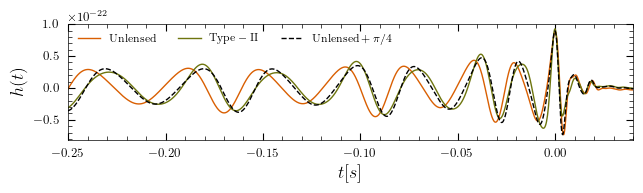

In [7]:
cmap = ['#d95f02', '#6E750E', '#1b9e77', '#253494', '#650021', 'grey', 'pink']

plt.figure(figsize=(6.5,2))
ax1=plt.subplot(111)
plt.plot(t, ht_new, lw=1, c=cmap[0], label='$\mathrm{Unlensed}$')
plt.plot(tL, ht_L_new, lw=1, c=cmap[1], label='$\mathrm{Type-II}$')
plt.plot(t_shift, ht_shift_new, lw=1, c='k', ls='--', label='$\mathrm{Unlensed} + \pi/4$')
plt.xlim(-0.25, 0.04)
plt.xlabel('$t[s]$', fontsize=13)
plt.ylabel('$h(t)$',fontsize=13)
plt.legend(ncol=4,prop={'size': 8}, frameon=False)
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(axis="x",which='minor',length=3, width=0.5,bottom=True,left=True,top=True,right=True,direction='in')
ax1.tick_params(axis="y",which='minor',length=3, width=0.5,bottom=True,left=True,top=True,right=True,direction='in')
ax1.tick_params(axis="x",which='major',length=5, width=0.8,bottom=True,left=True,top=True,right=True,direction='in')
ax1.tick_params(axis="y",which='major',length=5, width=0.8,bottom=True,left=True,top=True,right=True,direction='in')
plt.tight_layout()
#plt.savefig('../plots/Type2_lensed_waveform_Mtot%d_q%.2f_iota%.2f.pdf'%(Mtot, q, iota), dpi=400)
plt.show()